# Problem Statement

* Develop a model to predict the Air Quality Index (AQI) for a given city on a specific day based on historical air quality data

* The goal is to provide accurate forecasts to support public health and pollution management efforts.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt

# The dataset provided contains daily air quality data for Ahmedabad in 2015. Here's a detailed description of its structure and the columns:

1. City: Name of the city (Ahmedabad in this dataset).
2. Date: The specific date for the air quality measurements.
3. PM2.5: Concentration of particulate matter with a diameter of less than 2.5  micrometers, measured in µg/m³. Missing values are represented as .
4. PM10: Concentration of particulate matter with a diameter of less than 10 micrometers, measured in µg/m³. Missing values are represented as .
5. NO: Concentration of nitrogen monoxide, measured in µg/m³.
6. NO2: Concentration of nitrogen dioxide, measured in µg/m³.
7. NOx: Total concentration of nitrogen oxides (sum of NO and NO2), measured in µg/m³.
8. NH3: Concentration of ammonia, measured in µg/m³. Missing values are represented as .
9. CO: Concentration of carbon monoxide, measured in mg/m³.
10. SO2: Concentration of sulfur dioxide, measured in µg/m³.
11. O3: Concentration of ozone, measured in µg/m³.
12. Benzene: Concentration of benzene, measured in µg/m³.
13. Toluene: Concentration of toluene, measured in µg/m³.
14. Xylene: Concentration of xylene, measured in µg/m³.
15. AQI: Air Quality Index, which is a numerical scale representing the overall air quality. Missing values are represented as
16. AQI_Bucket: Air quality category corresponding to the AQI (e.g., "Good," "Moderate," "Poor"). Missing values are represented as

# 1. Understaning Dataset

In [9]:
data= pd.read_csv('/content/city_day.csv')
data


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [10]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [11]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [12]:
print(data.shape)

(29531, 16)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [14]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [15]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


<Axes: xlabel='PM2.5', ylabel='Count'>

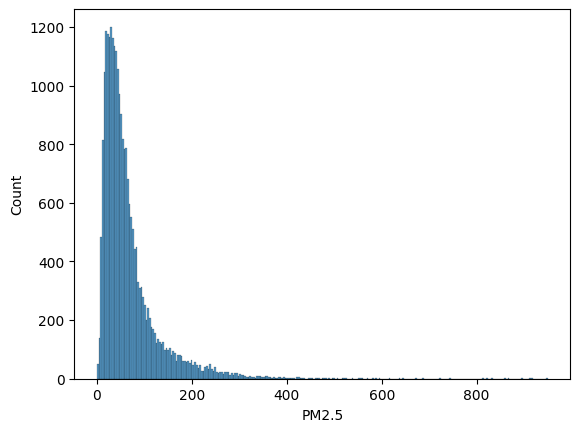

In [16]:
sns.histplot(data['PM2.5'])


<Axes: xlabel='PM10', ylabel='Count'>

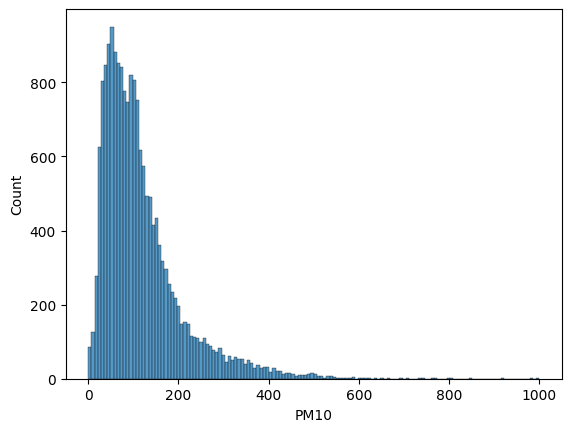

In [17]:
sns.histplot(data['PM10'])

<Axes: xlabel='count', ylabel='AQI_Bucket'>

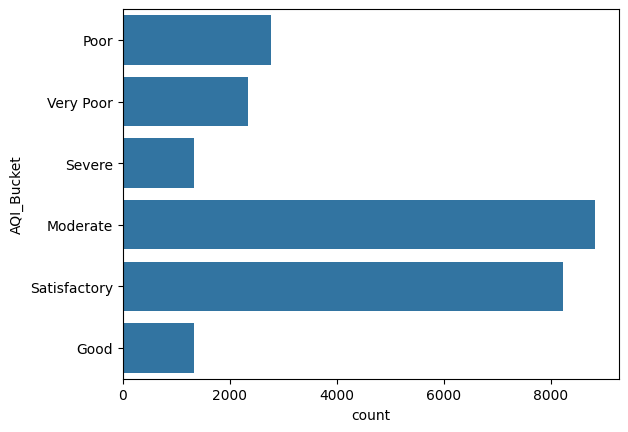

In [18]:
sns.countplot(data['AQI_Bucket'])

# data Cleaning

In [19]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1,2
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1,3
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1,4
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,6,27
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,6,28
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,6,29
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,6,30


The Date column is dropped using `data.drop('Date', axis=1, inplace=True)` when the date information is no longer relevant for analysis or when it has already been split into components like Year, Month, and Day. This simplifies the dataset and avoids redundancy.

In [20]:
data.drop('Date' , axis=1 , inplace=True)

The `drop` method is used to remove the **'AQI_Bucket'** column from the dataset. Dropping a column may be necessary if it's irrelevant, redundant, or not needed for analysis or modeling.

In [21]:
data.drop('AQI_Bucket',axis=1 , inplace=True)

The `drop` method is used to remove unnecessary or irrelevant columns, like `Xylene`, from the dataset to simplify analysis. Setting `axis=1` ensures it's dropping a column (not a row), and `inplace=True` modifies the dataset directly without creating a new copy.

In [22]:
data.drop('Xylene',axis=1 , inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  AQI      24850 non-null  float64
 13  Year     29531 non-null  int32  
 14  Month    29531 non-null  int32  
 15  Day      29531 non-null  int32  
dtypes: float64(12), int32(3), object(1)
memory usage: 3.3+ MB


In [24]:
missing_values = data.isnull().sum()
print(missing_values)

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
AQI         4681
Year           0
Month          0
Day            0
dtype: int64


The **median** is used in a dataset to handle missing values because it is resistant to outliers and better represents the central tendency for skewed data, ensuring accurate imputation without distortion. It’s ideal when the data is not normally distributed.

In [25]:
data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['NO'].fillna(data['NO'].median(), inplace=True)
data['NO2'].fillna(data['NO2'].median(), inplace=True)
data['NOx'].fillna(data['NOx'].median(), inplace=True)
data['NH3'].fillna(data['NH3'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)
data['Benzene'].fillna(data['Benzene'].median(), inplace=True)
data['Toluene'].fillna(data['Toluene'].median(), inplace=True)
data['AQI'].fillna(data['AQI'].median(), inplace=True)


<ipython-input-25-c62e8798cbd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
<ipython-input-25-c62e8798cbd4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

`LabelEncoder` is used to convert categorical variables into numerical values, making it easier to apply machine learning algorithms that require numeric input. It assigns a unique integer to each category, ensuring the data is in a format the model can process.

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])

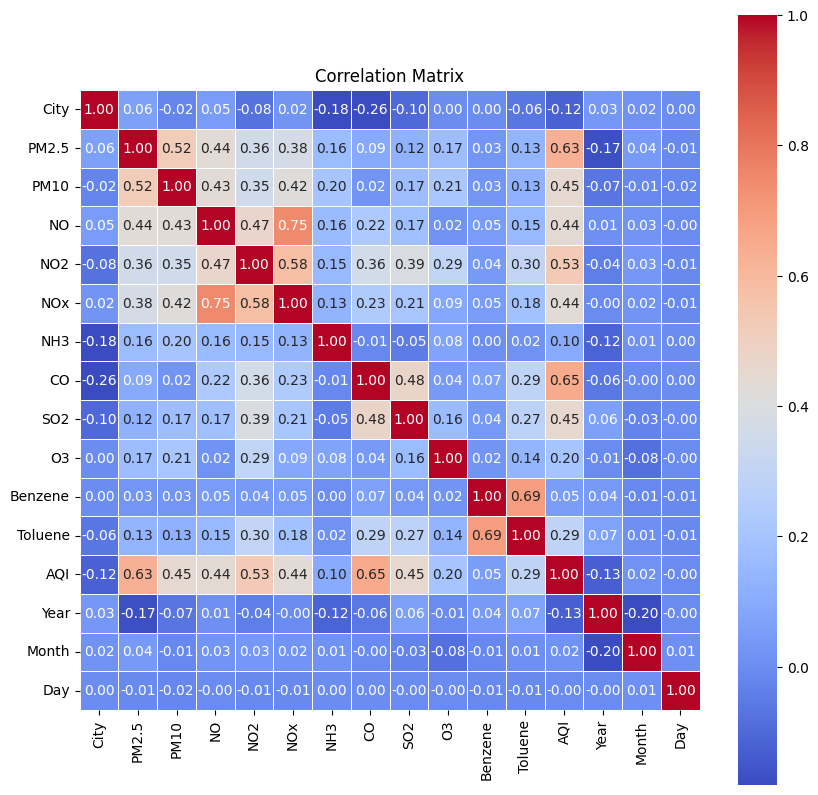

In [27]:
Corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5,annot_kws=None,robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

AQI_corr = data.corr()['AQI']
AQI_corr.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


In [29]:
data.drop("Benzene",axis=1,inplace=True)
data.drop("Toluene",axis=1,inplace=True)
data.drop("NO",axis=1,inplace=True)
data.drop("NH3",axis=1,inplace=True)
data.drop("Day",axis=1,inplace=True)
data.drop("O3",axis=1,inplace=True)
data.drop("City",axis=1,inplace=True)
data.drop("Year",axis=1,inplace=True)
data.drop("Month",axis=1,inplace=True)

In [30]:
data['PM10']

,PM10
0,95.68
1,95.68
2,95.68
3,95.68
4,95.68
...,...
29526,50.94
29527,74.09
29528,65.73
29529,49.97


In [31]:
data['PM2.5']=np.log1p(data['PM2.5'])
data['PM10']=np.log1p(data['PM10'])
data['CO']=np.log1p(data['CO'])
data['NO2']=np.log1p(data['NO2'])
data['NOx']=np.log1p(data['NOx'])
data['SO2']=np.log1p(data['SO2'])
data['AQI']=np.log1p(data['AQI'])

<Axes: ylabel='Count'>

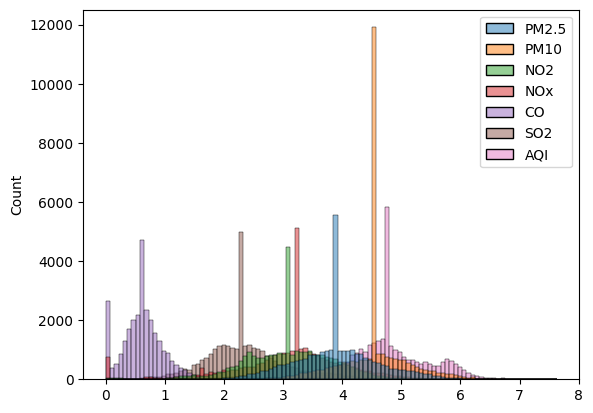

In [32]:
sns.histplot(data)

# Outlier layer

<Axes: >

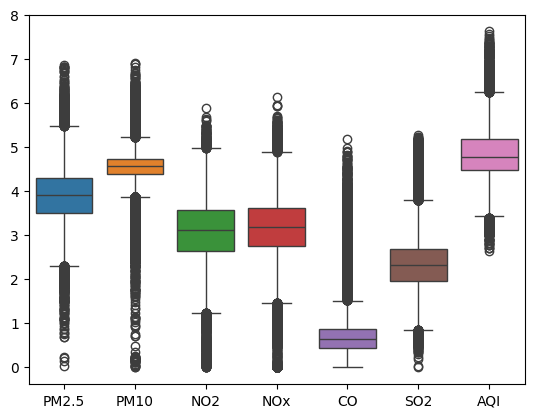

In [33]:
sns.boxplot(data)

In [34]:
X = data[['PM2.5','PM10','NO2','NOx','CO','SO2']]
y = data['AQI']

In [35]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([4.61404827, 4.61404827, 4.91772061, ..., 4.88815426, 4.45707233,
       4.82686356])

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmes = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)

In [40]:
data=scaled_data
data

,PM2.5,PM10,NO2,NOx,CO,SO2
0,0.566736,0.661195,0.500592,0.471343,0.126051,0.635622
1,0.566736,0.661195,0.476609,0.465041,0.131019,0.613927
2,0.566736,0.661195,0.509882,0.556808,0.562765,0.644881
3,0.566736,0.661195,0.502876,0.478528,0.191930,0.563452
4,0.566736,0.661195,0.526761,0.594715,0.606722,0.700668
...,...,...,...,...,...,...
29526,0.401071,0.571134,0.552325,0.491458,0.074446,0.426919
29527,0.468555,0.624563,0.558724,0.465691,0.080909,0.495770
29528,0.459804,0.607454,0.579225,0.481585,0.075756,0.424315
29529,0.415200,0.568401,0.577716,0.485491,0.080909,0.450996


In [41]:
def remove_outliers_iqr(df, exclude_column):
    for col in data.columns:
        if col == exclude_column:
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_cleaned = remove_outliers_iqr(data, exclude_column='AQI')
df_cleaned

,PM2.5,PM10,NO2,NOx,CO,SO2
0,0.566736,0.661195,0.500592,0.471343,0.126051,0.635622
1,0.566736,0.661195,0.476609,0.465041,0.131019,0.613927
2,0.566736,0.661195,0.509882,0.556808,0.562765,0.644881
3,0.566736,0.661195,0.502876,0.478528,0.191930,0.563452
4,0.566736,0.661195,0.526761,0.594715,0.606722,0.700668
...,...,...,...,...,...,...
29526,0.401071,0.571134,0.552325,0.491458,0.074446,0.426919
29527,0.468555,0.624563,0.558724,0.465691,0.080909,0.495770
29528,0.459804,0.607454,0.579225,0.481585,0.075756,0.424315
29529,0.415200,0.568401,0.577716,0.485491,0.080909,0.450996


In [42]:
df=df_cleaned
df.shape

(29531, 6)

In [43]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.08057746505902724
R-squared: 0.7771877567286039


In [44]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 0.046255569923661984
Random Forest - R-squared: 0.8720944213008174


In [45]:
data.shape

(29531, 6)

In [46]:
import pickle as pkl
pkl.dump(model,open('model.pkl','wb'))